# Task 3: Bifurcations in higher dimensions

## Andronov-Hopf bifurcation:

![\begin{equation} \\ \dot{x_1} = \alpha x_1 - x_2 - x_1(x_1^2+x_2^2) \\ \dot{x_2} = x_1 +\alpha x_2 - x_2(x_1^2+x_2^2) \end{equation}](https://latex.codecogs.com/svg.latex?\begin{equation}&space;\\&space;\dot{x_1}&space;=&space;\alpha&space;x_1&space;-&space;x_2&space;-&space;x_1(x_1^2&plus;x_2^2)&space;\\&space;\dot{x_2}&space;=&space;x_1&space;&plus;\alpha&space;x_2&space;-&space;x_2(x_1^2&plus;x_2^2)&space;\end{equation})

This is an nonlinear system - we cannot use matrix representation, or calculate eigenvalues



In [1]:
# Imports
import numpy as np
import sw.task3 as t3
import scipy.integrate as scp
import matplotlib.pyplot as plt
from sw.utils.plot_utils import configuration, add_orbit

## a) Stream plots using a = [-2,0,2]

In [2]:
# Simulation values
x0 = [0.25,0]
t = [0,5]

/Users/geirolatvinnereim/Documents/MLCMS-C/exercise_3/sw/task3.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 20))


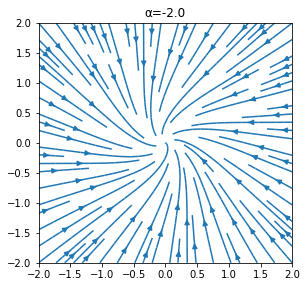

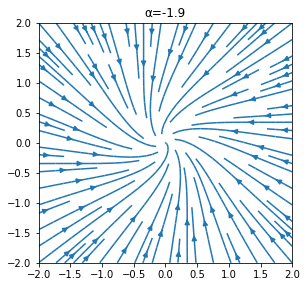

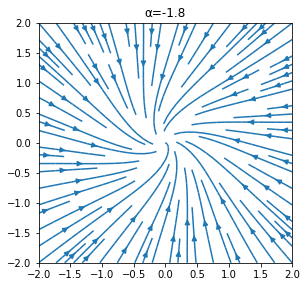

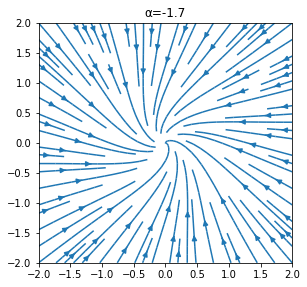

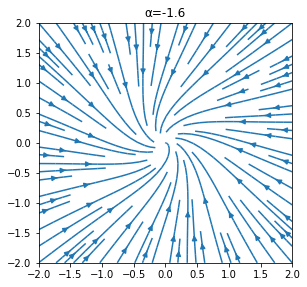

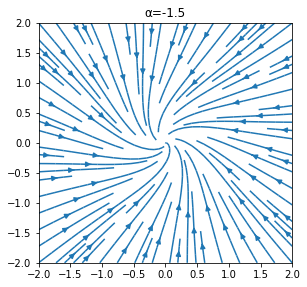

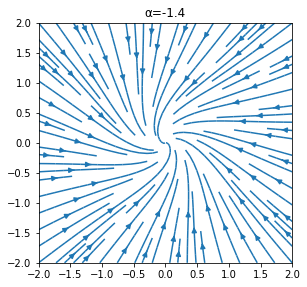

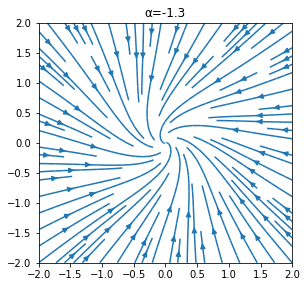

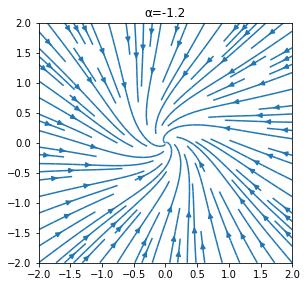

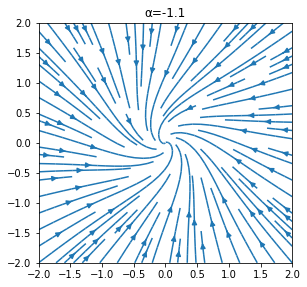

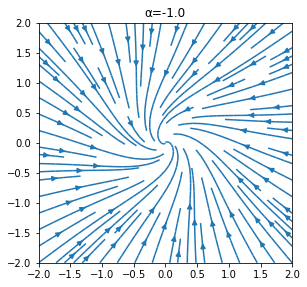

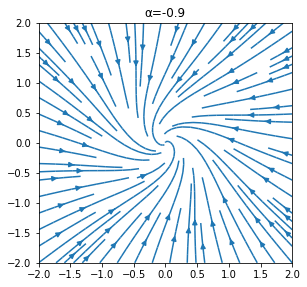

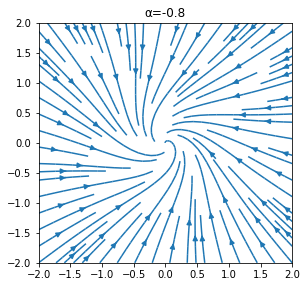

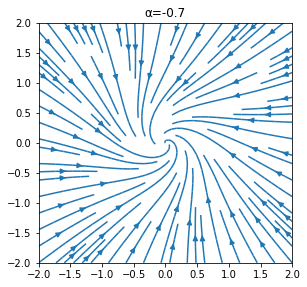

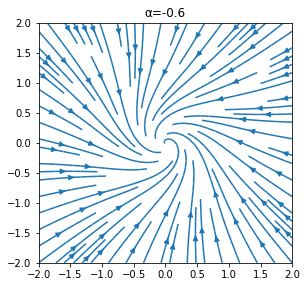

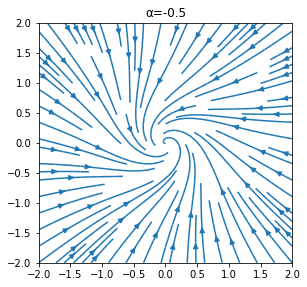

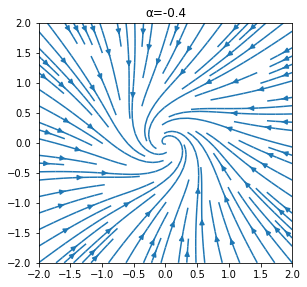

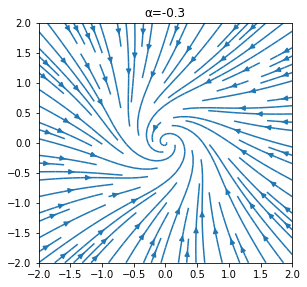

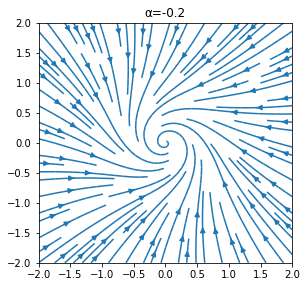

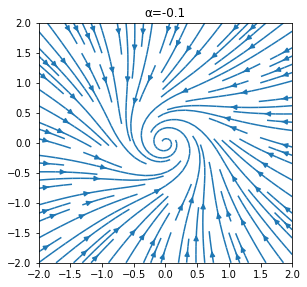

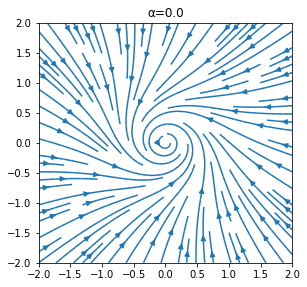

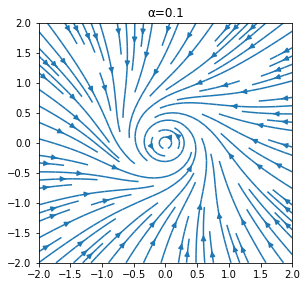

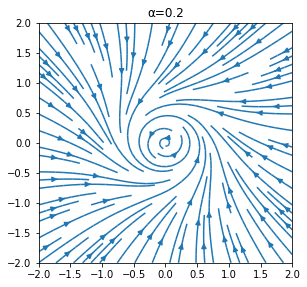

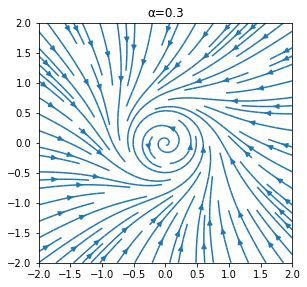

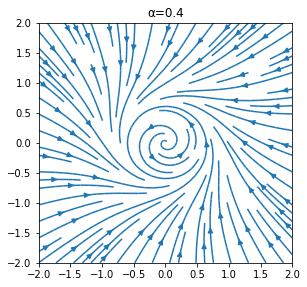

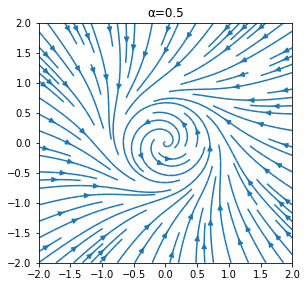

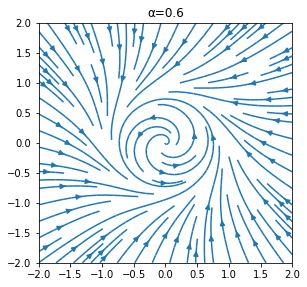

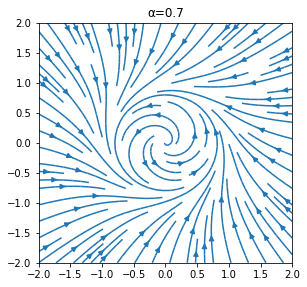

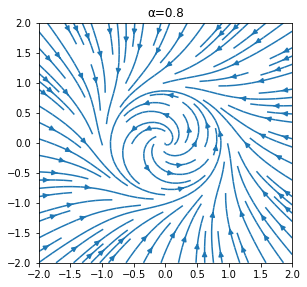

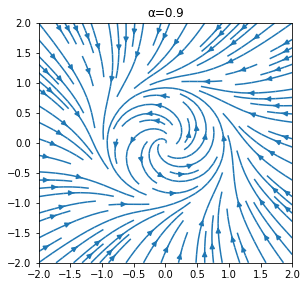

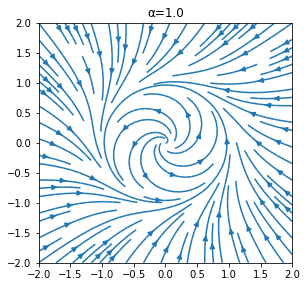

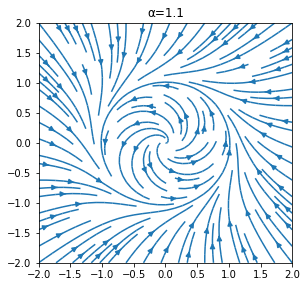

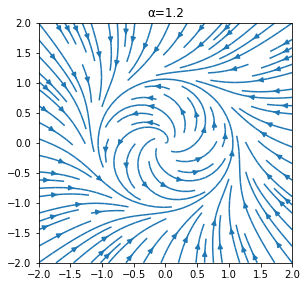

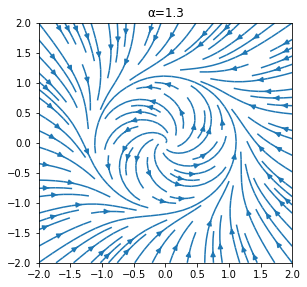

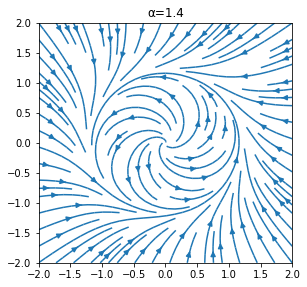

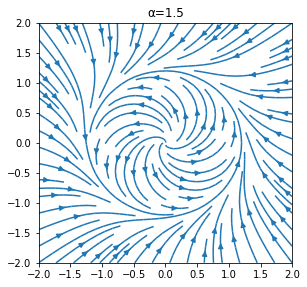

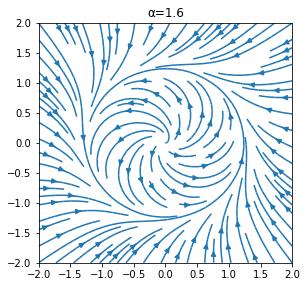

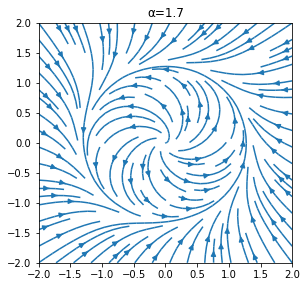

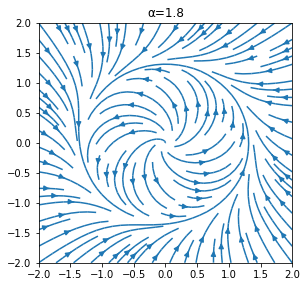

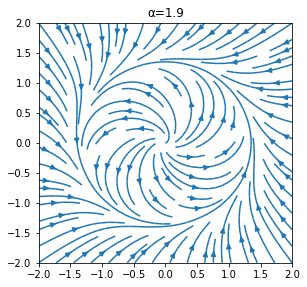

In [3]:
for alpha in np.arange(-2,2,0.1):
    t3.plot_phase_portrait(alpha)

## b) Simulating orbits using RK45

In [4]:
initial_point1 = [2,0]
initial_point2 = [0.5,0]

t = [0,10]
alpha = 1
resolution = np.arange(t[0],t[1],0.1)

## Plot for x0 = (2,0) 

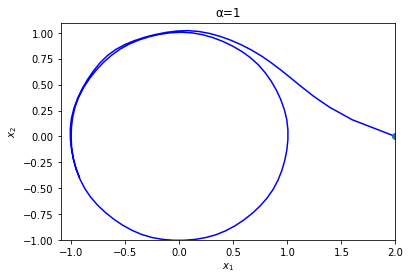

In [6]:
flow1 = scp.solve_ivp(t3.AndronovHopf,t,initial_point1,args=[alpha],t_eval=resolution)

# plot flow
plt.figure()
add_orbit(flow1,"b-")
configuration("α=1",'$x_1$','$x_2$',[-1.1,2],[-1,1.1])

## Plot for x0 = (0.5,0) 

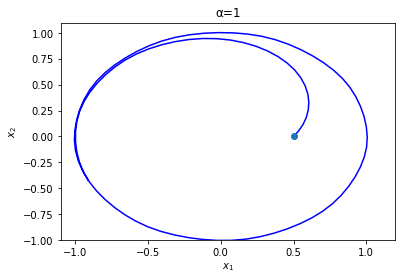

In [7]:
flow2 = scp.solve_ivp(t3.AndronovHopf,t,initial_point2,args=[alpha],t_eval=resolution)

# plot flow
plt.figure()
add_orbit(flow2,"b-")
configuration("α=1",'$x_1$','$x_2$',[-1.1,1.2],[-1,1.1])

## c) Bifurcation surface - cusp bifurcation

![\dot{x} = \alpha_1 + \alpha_2 x - x^3](https://latex.codecogs.com/svg.latex?\dot{x}&space;=&space;\alpha_1&space;&plus;&space;\alpha_2&space;x&space;-&space;x^3)

A bifurcation plot can be obtained by solving the differential equation until the derivative is sufficiently small. Then we assume we have found a steady state of the system configuration. By looping through every configuration we can create a graph. 

In [8]:
from sympy import symbols

In [9]:
a1 = symbols("a1",real=True)

a1_axis = []
a2_axis = []
x_axis = []

t3.calculate_bifurcation_surface(a1_axis,a2_axis,x_axis,a1)

## 3D plot

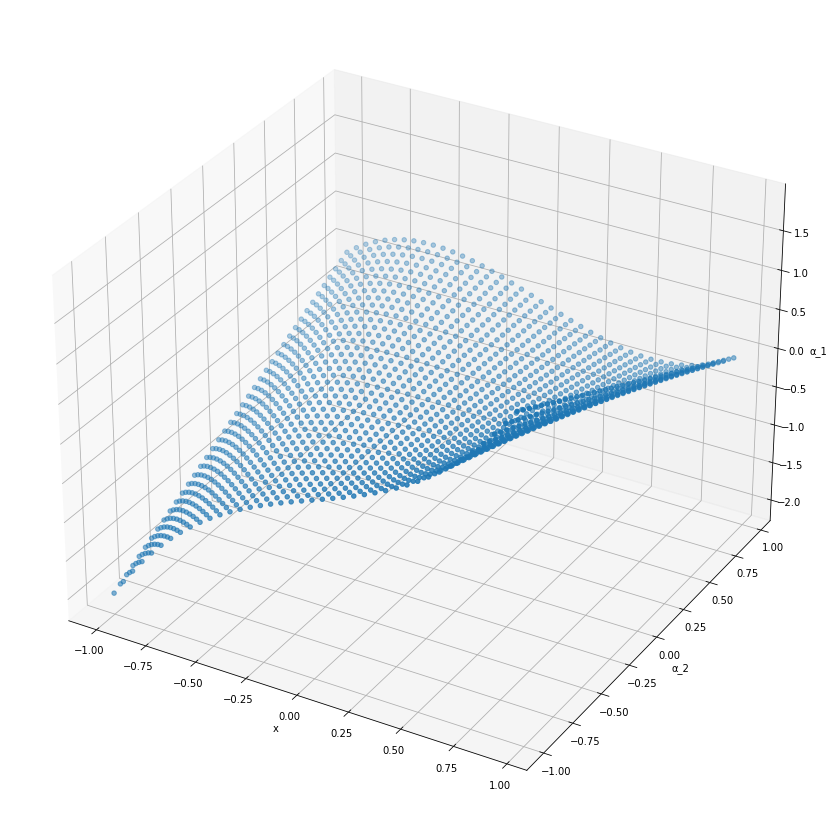

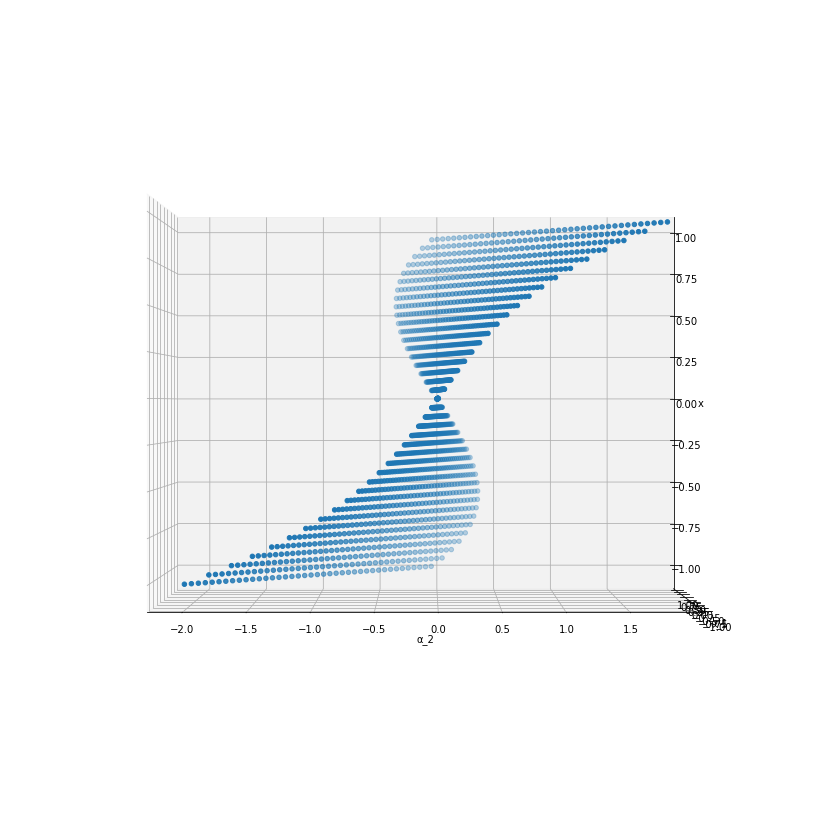

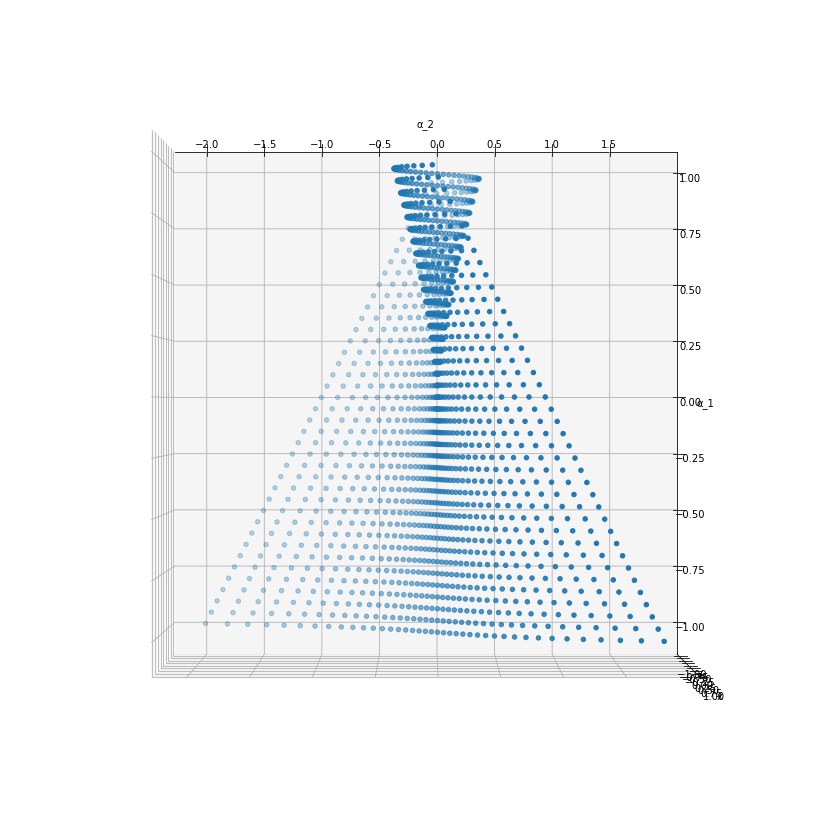

In [10]:
t3.plot_bifurcation_surface(a1_axis,x_axis,a2_axis,xlabel="x",ylabel="α_2",zlabel="α_1")
t3.plot_bifurcation_surface(x_axis,a1_axis,a2_axis,0,-90)
t3.plot_bifurcation_surface(x_axis,a1_axis,a2_axis,90,-90)